In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from scipy.stats import chi2_contingency

## Exploratory Data Analysis

#### Loading the data

In [2]:
asthma_dataset = pd.read_csv('../data/asthma_disease_data.csv')

In [4]:
pd.set_option('display.max_columns', None)
asthma_dataset.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
asthma_dataset.shape

(2392, 29)

#### Exploring the data

In [9]:
asthma_dataset.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [53]:
# Isolating binary categorical variables
asthma_int_cols = asthma_dataset.select_dtypes(include='int')
asthma_int_cols = asthma_int_cols[[col for col in asthma_int_cols.columns if col not in ['Age','PatientID']]]
asthma_int_cols.head()

,Gender,Ethnicity,EducationLevel,Smoking,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
1,1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,1,0
2,0,2,1,0,0,1,1,0,1,0,1,1,1,0,1,1,0
3,1,2,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0
4,0,0,3,0,0,0,0,0,1,0,1,1,1,0,0,1,0


In [51]:
for col in asthma_int_cols.columns:
    print(asthma_dataset[col].value_counts())

Gender
0    1212
1    1180
Name: count, dtype: int64
Ethnicity
0    1465
1     475
2     229
3     223
Name: count, dtype: int64
EducationLevel
1    933
2    749
0    478
3    232
Name: count, dtype: int64
Smoking
0    2053
1     339
Name: count, dtype: int64
PetAllergy
0    1995
1     397
Name: count, dtype: int64
FamilyHistoryAsthma
0    1672
1     720
Name: count, dtype: int64
HistoryOfAllergies
0    1437
1     955
Name: count, dtype: int64
Eczema
0    1933
1     459
Name: count, dtype: int64
HayFever
0    1786
1     606
Name: count, dtype: int64
GastroesophagealReflux
0    2014
1     378
Name: count, dtype: int64
Wheezing
1    1426
0     966
Name: count, dtype: int64
ShortnessOfBreath
1    1197
0    1195
Name: count, dtype: int64
ChestTightness
1    1204
0    1188
Name: count, dtype: int64
Coughing
1    1204
0    1188
Name: count, dtype: int64
NighttimeSymptoms
1    1441
0     951
Name: count, dtype: int64
ExerciseInduced
1    1447
0     945
Name: count, dtype: int64
Diagnosis
0   

Most of the variables are highly imbalances, except for few like Gender and Coughing. The target variable is also imbalances.

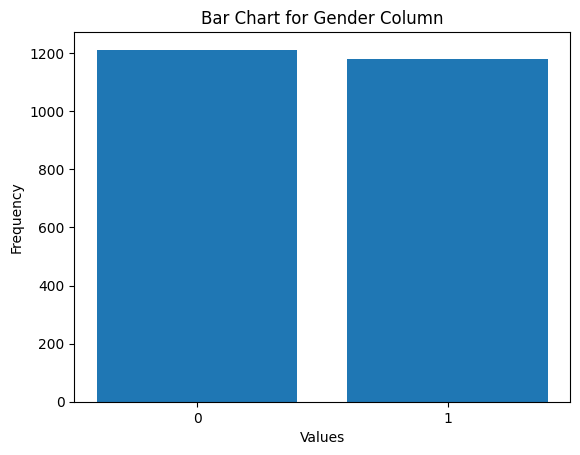

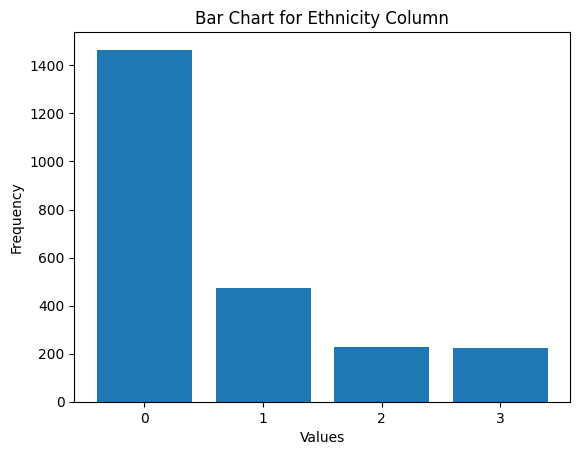

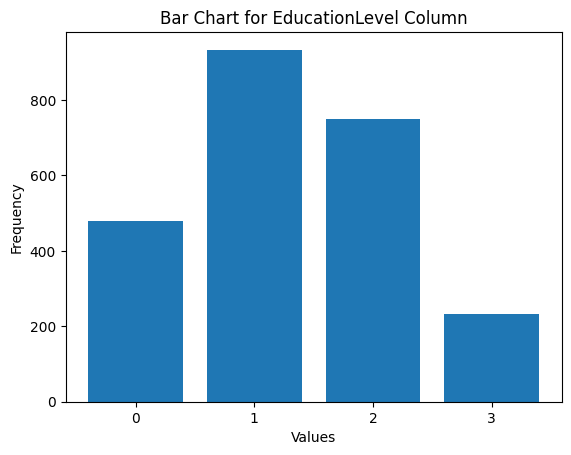

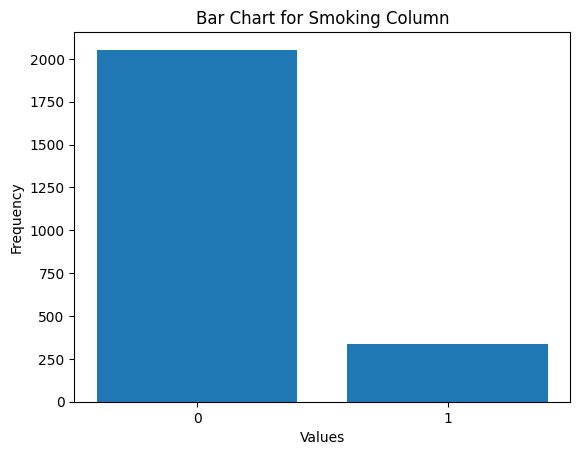

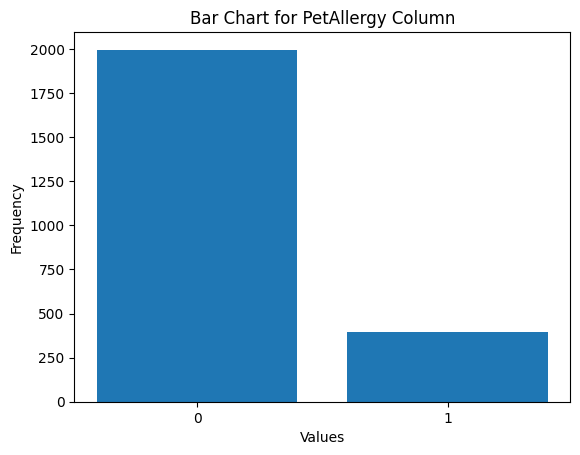

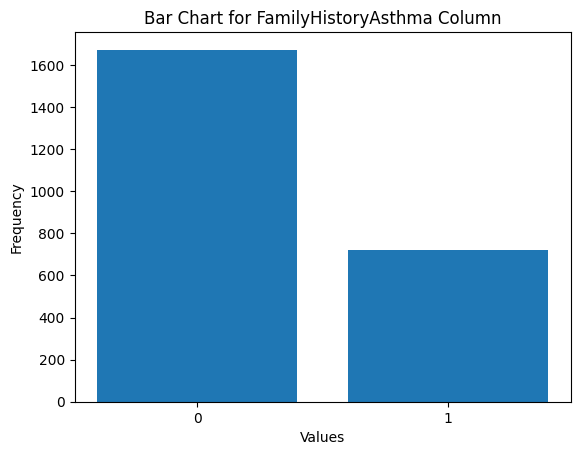

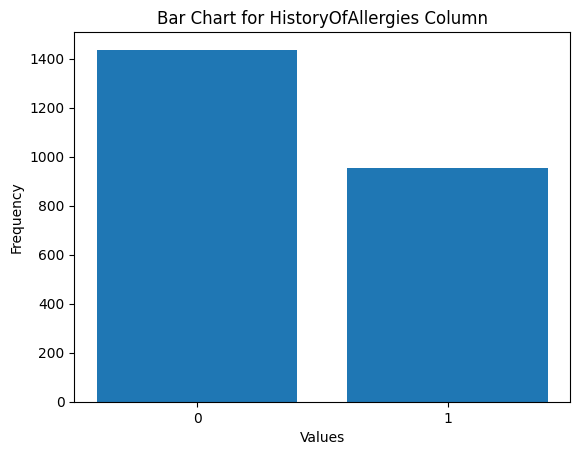

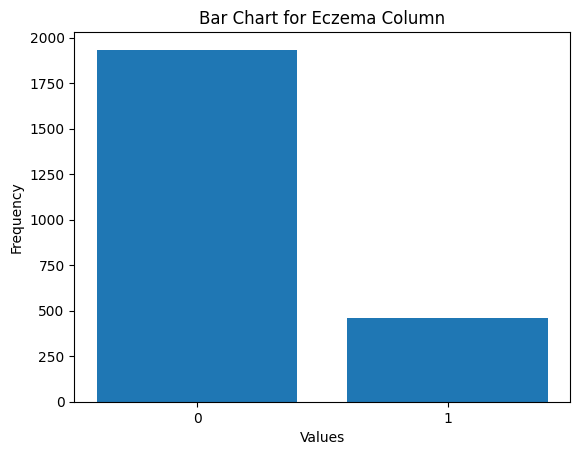

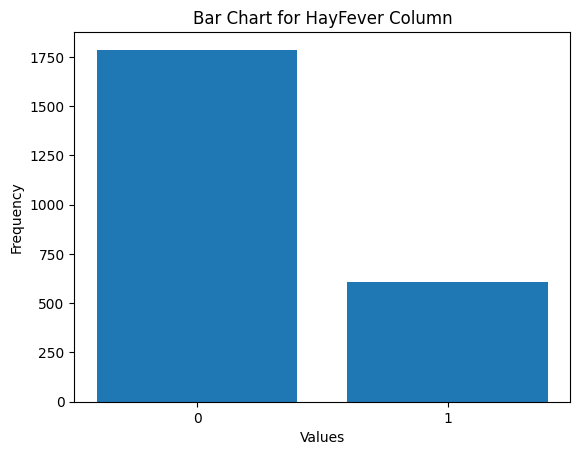

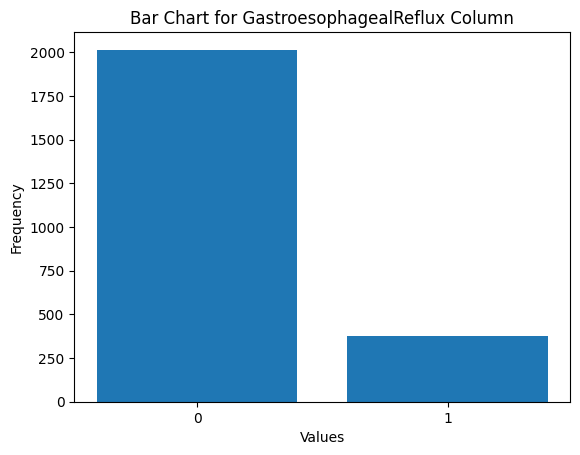

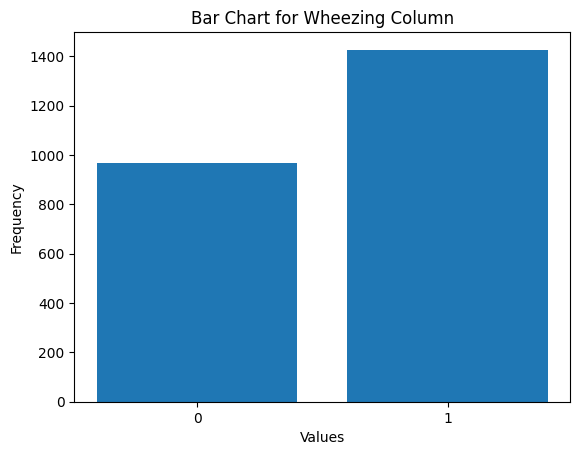

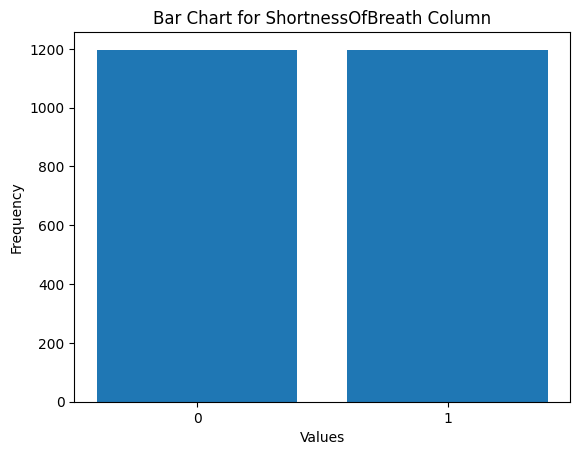

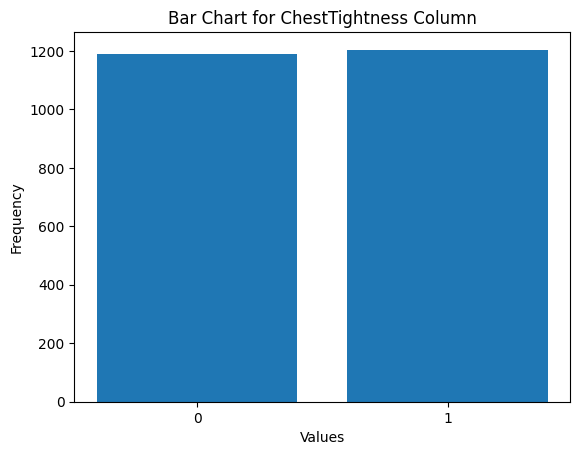

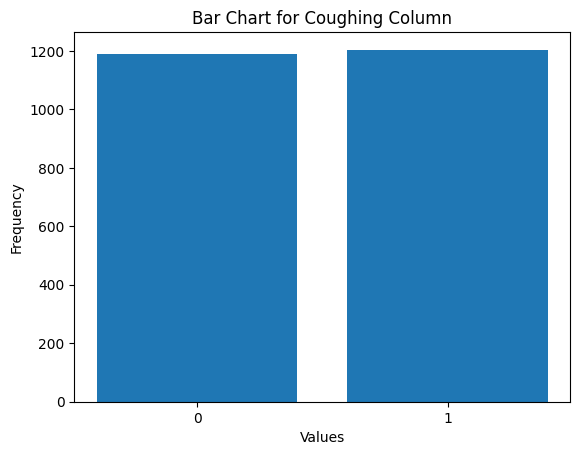

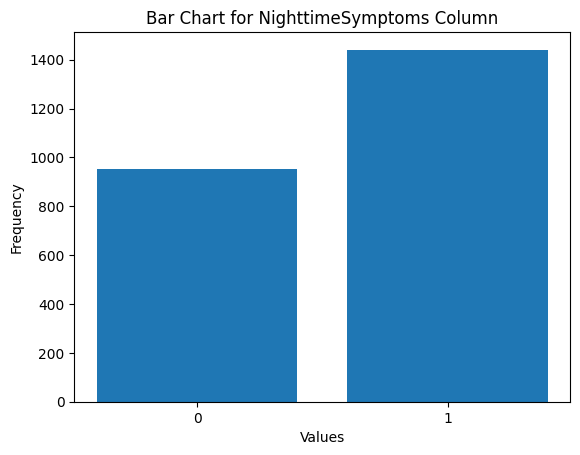

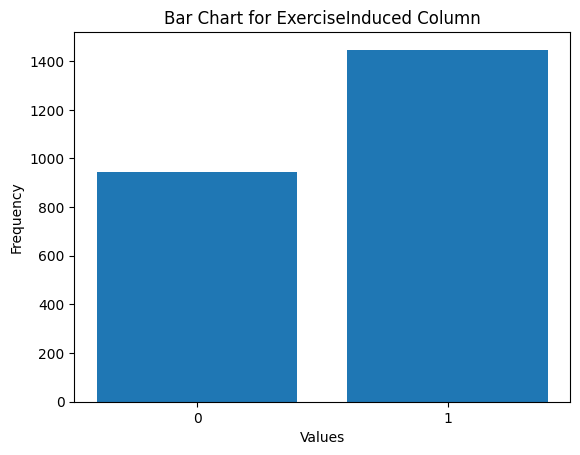

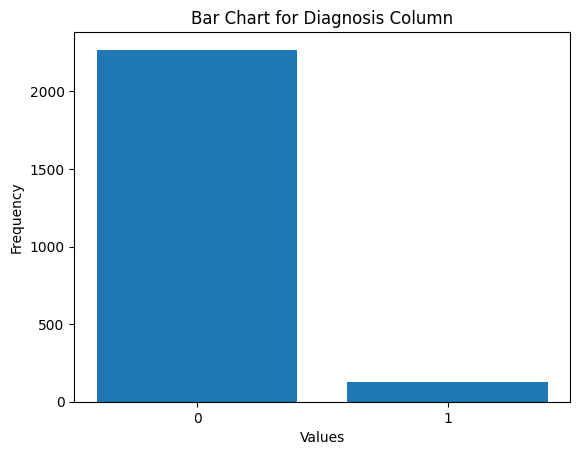

In [63]:
for col in asthma_int_cols.columns:
    plt.figure()
    plt.bar(asthma_int_cols[col].value_counts().index, asthma_int_cols[col].value_counts().values)
    plt.xticks(asthma_int_cols[col].value_counts().index)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart for {col} Column')
    plt.show()

Let's visualize the numerical variables

In [73]:
asthma_dataset_num_cols = asthma_dataset.select_dtypes(include = 'float')
asthma_dataset_num_cols = asthma_dataset[list(asthma_dataset_num_cols.columns) + ['Age']]
asthma_dataset_num_cols

,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC,Age
0,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,4.941206,63
1,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,1.702393,26
2,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,5.022553,57
3,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,2.300159,40
4,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,3.067944,61
...,...,...,...,...,...,...,...,...,...,...
2387,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,3.125249,5.166032,43
2388,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,1.132977,5.509502,18
2389,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,1.685962,3.346877,54
2390,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,3.481549,1.713274,46


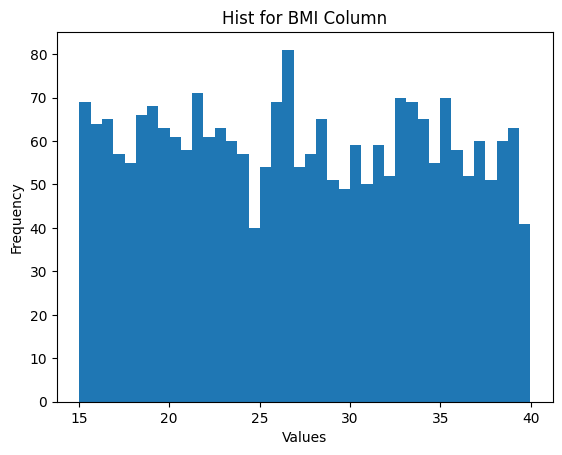

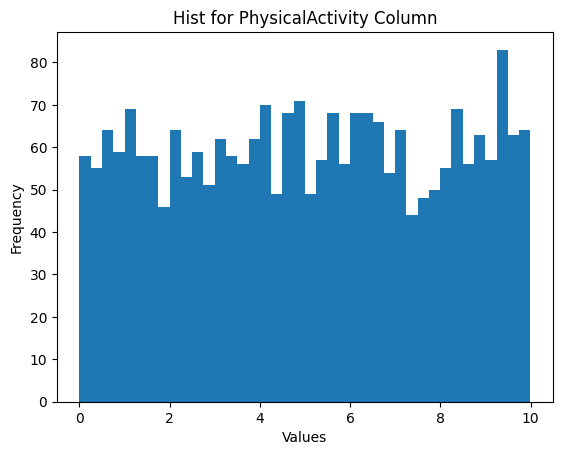

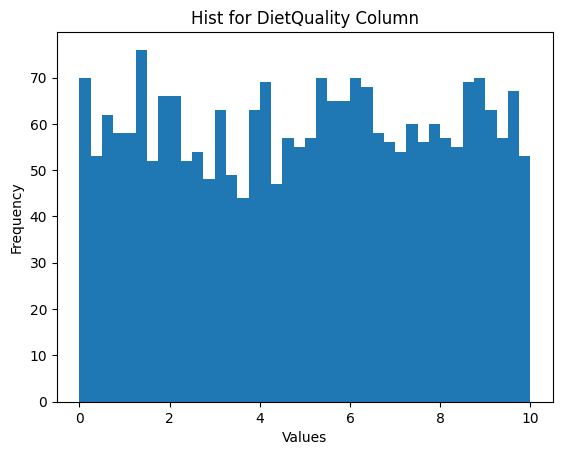

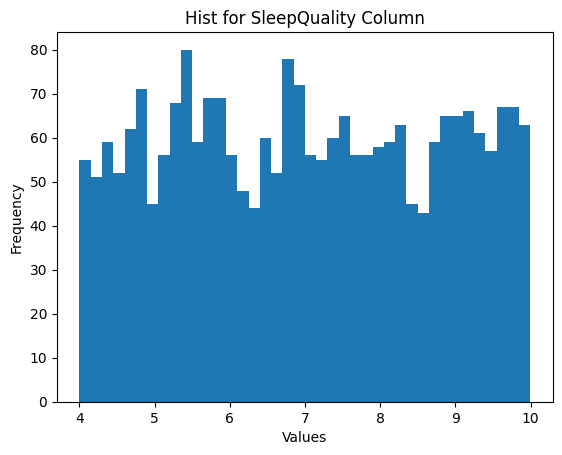

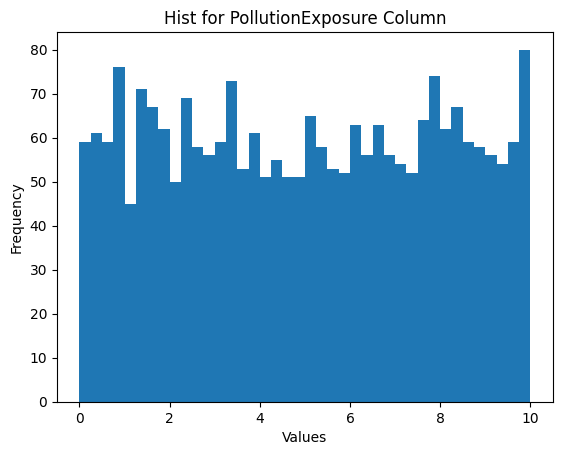

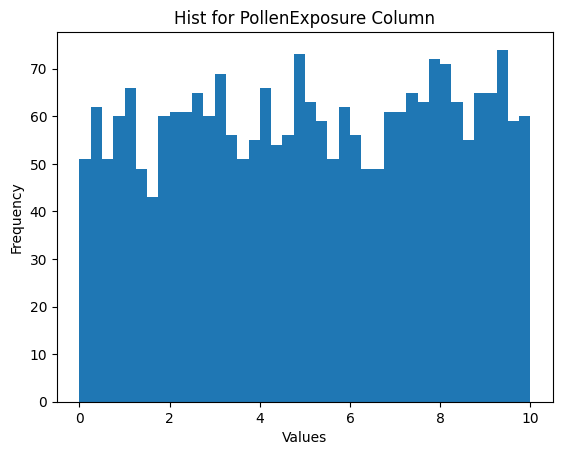

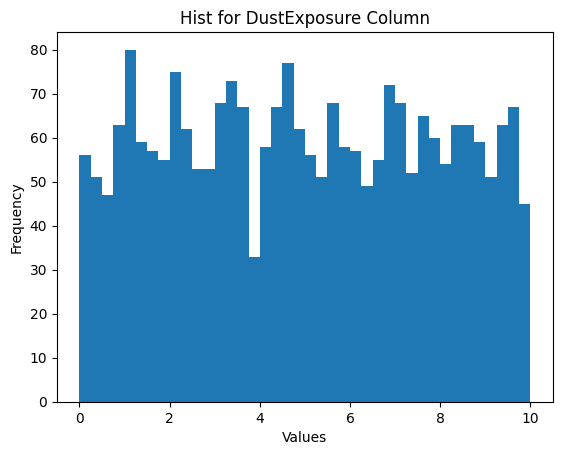

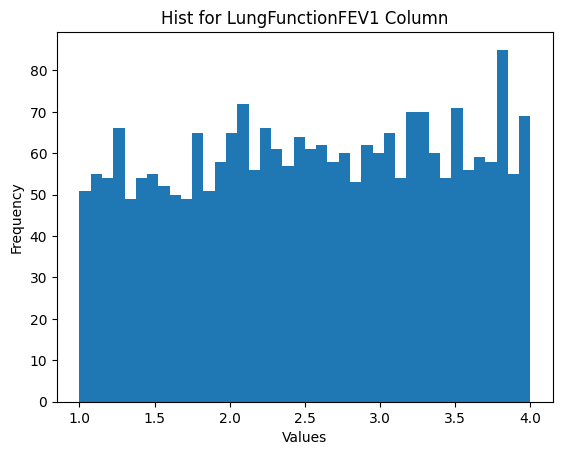

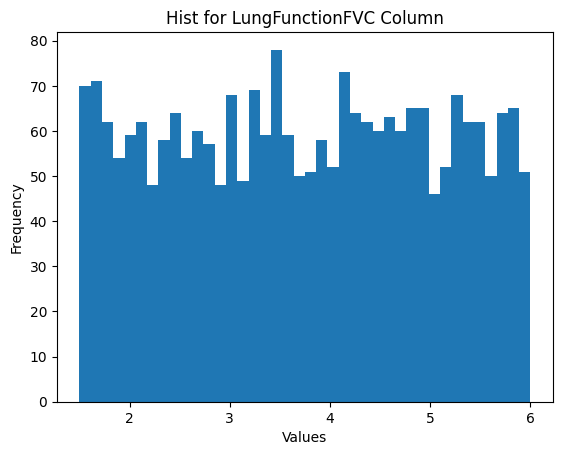

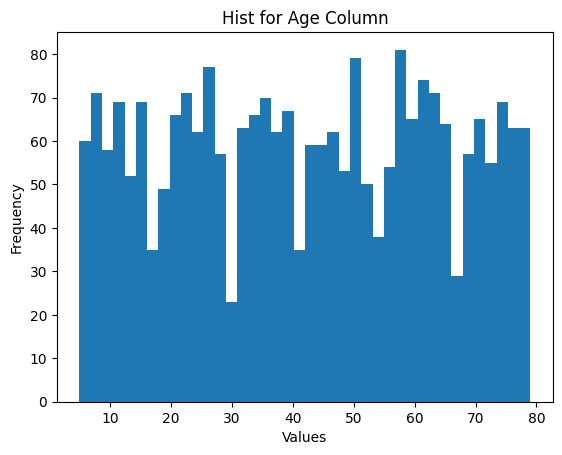

In [76]:
for col in asthma_dataset_num_cols.columns:
    plt.figure()
    plt.hist(asthma_dataset_num_cols[col], bins=40)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Hist for {col} Column')
    plt.show()

Nothing stands out for me as of now from plotting the numeric variables.

#### Correlation Matrix

In [86]:
corr_matrix = asthma_dataset[[col for col in asthma_dataset.columns if col not in  ['PatientID', 'DoctorInCharge']]].corr().round(2)
corr_matrix

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
Age,1.00,-0.00,0.02,-0.01,0.02,-0.01,0.00,0.00,0.00,-0.04,-0.01,0.01,-0.03,0.03,-0.04,0.00,-0.03,0.02,-0.01,0.01,0.01,0.02,-0.01,0.03,-0.03,0.02,-0.02
Gender,-0.00,1.00,0.02,-0.03,0.02,-0.01,0.02,-0.02,-0.02,0.00,-0.03,-0.02,0.01,0.01,-0.02,-0.01,0.01,-0.00,0.01,-0.03,-0.01,0.02,0.00,-0.01,-0.00,0.03,0.00
Ethnicity,0.02,0.02,1.00,0.00,0.01,-0.01,0.04,0.01,-0.01,-0.04,-0.03,0.03,0.02,0.02,-0.02,-0.00,0.02,-0.02,-0.02,0.03,-0.01,0.02,-0.01,-0.03,0.01,0.01,0.02
EducationLevel,-0.01,-0.03,0.00,1.00,0.00,0.01,-0.02,-0.04,0.02,0.03,0.00,-0.03,0.04,0.02,0.00,0.01,0.03,0.02,-0.00,-0.00,0.01,0.01,-0.03,-0.02,-0.00,-0.01,0.01
BMI,0.02,0.02,0.01,0.00,1.00,0.00,-0.01,-0.01,-0.01,-0.03,-0.01,0.06,0.00,0.01,0.00,0.01,0.01,0.01,-0.01,0.00,0.05,0.02,-0.01,-0.00,-0.00,0.01,-0.01
Smoking,-0.01,-0.01,-0.01,0.01,0.00,1.00,0.01,-0.03,-0.01,0.01,-0.00,-0.01,0.02,-0.01,-0.00,0.01,-0.00,0.03,0.02,0.02,-0.01,-0.06,-0.01,-0.01,0.01,-0.00,-0.02
PhysicalActivity,0.00,0.02,0.04,-0.02,-0.01,0.01,1.00,0.05,0.01,-0.03,0.01,-0.01,-0.01,-0.00,0.04,-0.01,-0.02,-0.04,0.02,-0.03,0.01,-0.02,-0.03,0.00,-0.01,-0.00,0.01
DietQuality,0.00,-0.02,0.01,-0.04,-0.01,-0.03,0.05,1.00,0.01,0.01,0.02,-0.03,-0.05,-0.01,0.03,0.03,0.02,0.02,-0.01,-0.00,0.04,0.04,0.01,-0.01,0.02,-0.02,-0.00
SleepQuality,0.00,-0.02,-0.01,0.02,-0.01,-0.01,0.01,0.01,1.00,-0.03,-0.04,-0.03,-0.04,0.01,-0.02,-0.00,-0.02,-0.04,-0.00,0.00,0.01,-0.01,-0.01,0.02,-0.01,-0.03,0.02
PollutionExposure,-0.04,0.00,-0.04,0.03,-0.03,0.01,-0.03,0.01,-0.03,1.00,0.01,-0.01,0.02,-0.01,0.01,0.00,-0.01,0.01,-0.02,0.03,-0.01,0.02,0.03,0.01,0.01,-0.01,-0.00


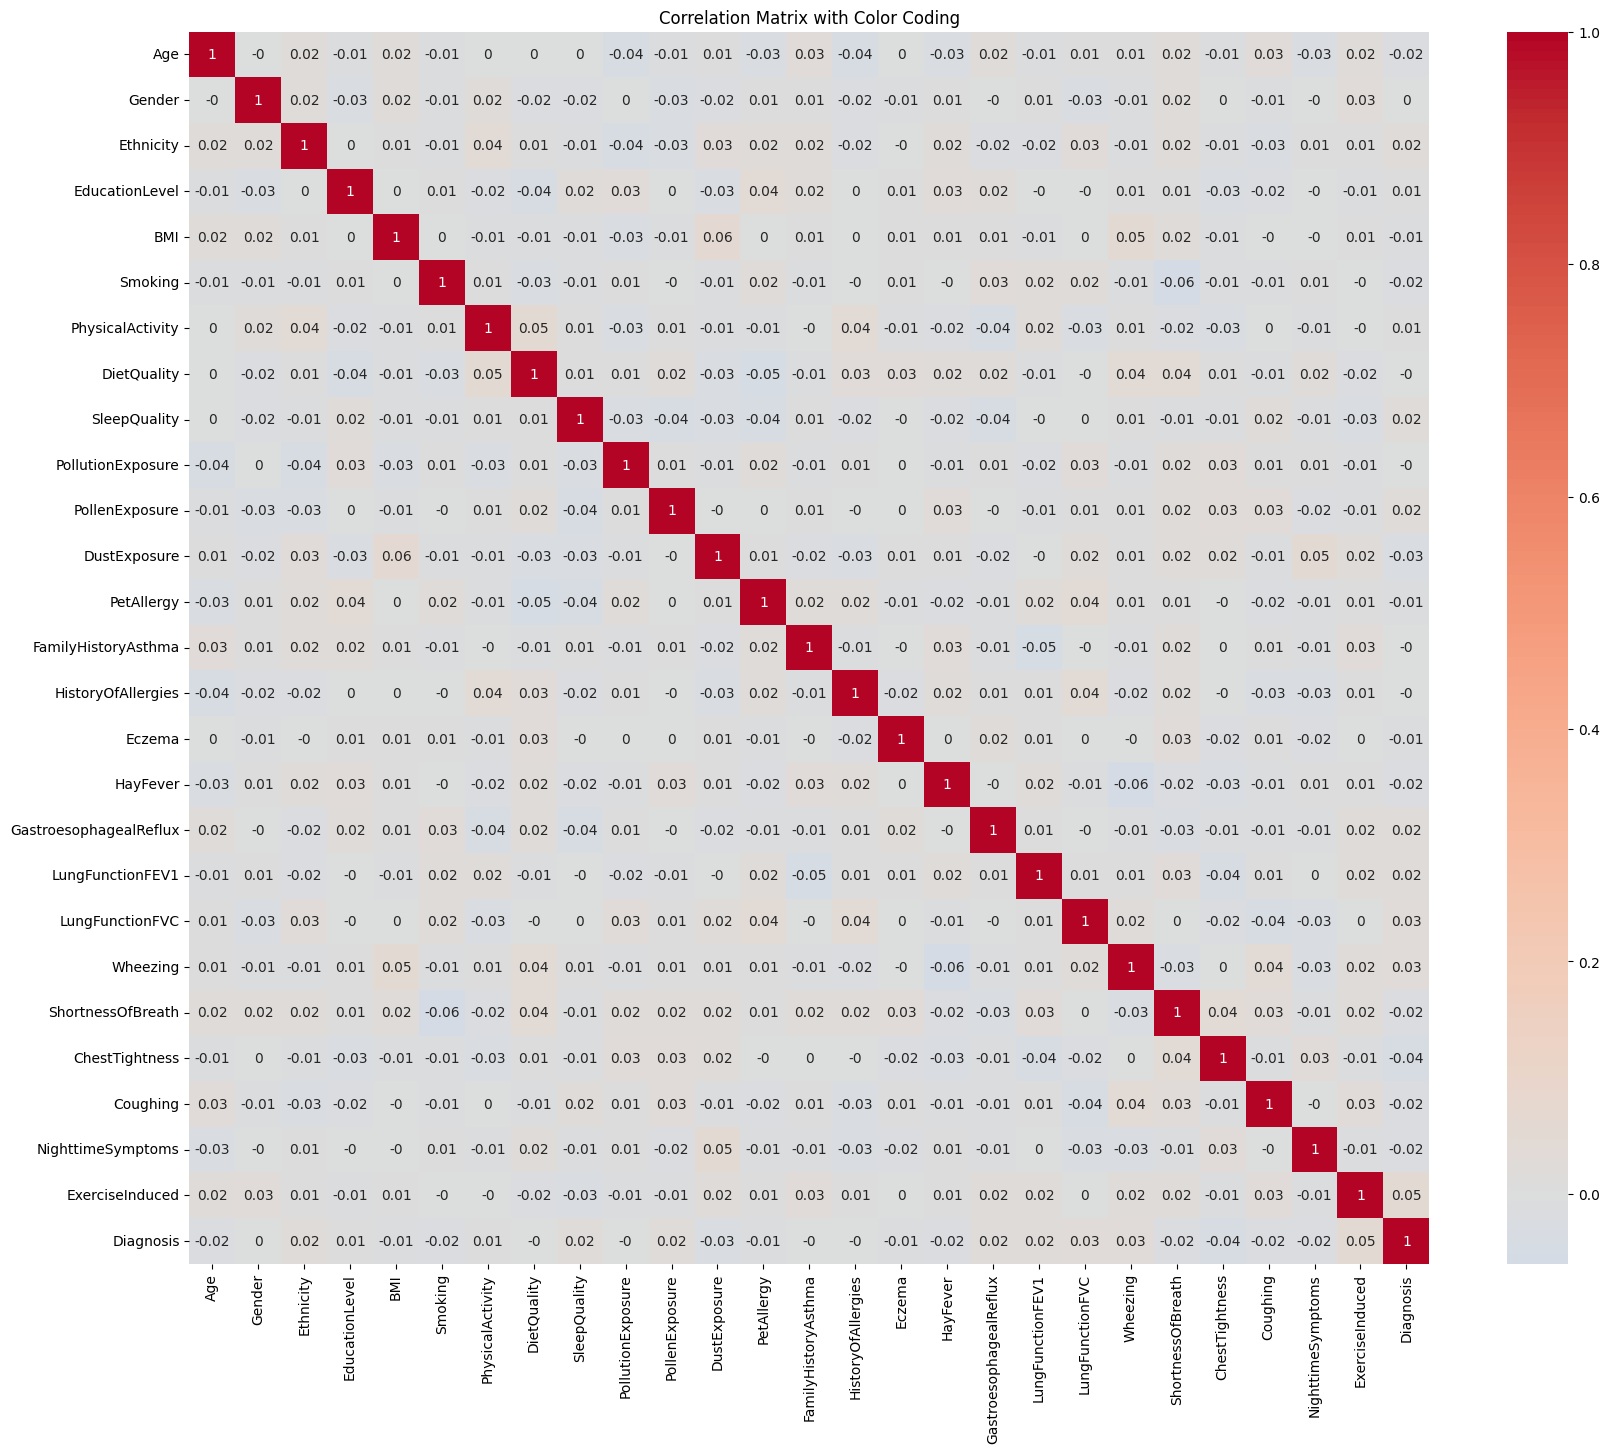

In [94]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix with Color Coding")
plt.show()

We don't see a strong correlation between any of the features and the target. But we also don't see a strong pair-wise correlation between any two features. But this is not unexpected, given that the Pearson's correlation is not suitable to measure the linear relationship between categorical variables. A chi-square test of independence is more appropriate.

In [112]:
pairs = list(itertools.combinations(asthma_int_cols.columns, 2))

for pair in pairs:
    contingency_table = pd.crosstab(asthma_int_cols[pair[0]], asthma_int_cols[pair[1]])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    if p_val <= 0.1:
        print(f"Chi-Square Test between {pair[0]} and {pair[1]}:")
        print("Chi-Square Statistic:", chi2_stat)
        print("P-Value:", p_val)
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies:")
        print(expected)
        print("------------------------------------------------")

Chi-Square Test between Ethnicity and ShortnessOfBreath:
Chi-Square Statistic: 6.482789858884414
P-Value: 0.09034370598067706
Degrees of Freedom: 3
Expected Frequencies:
[[731.88754181 733.11245819]
 [237.3014214  237.6985786 ]
 [114.40426421 114.59573579]
 [111.40677258 111.59322742]]
------------------------------------------------
Chi-Square Test between EducationLevel and PetAllergy:
Chi-Square Statistic: 7.387168103604527
P-Value: 0.060529572983287795
Degrees of Freedom: 3
Expected Frequencies:
[[398.66638796  79.33361204]
 [778.15008361 154.84991639]
 [624.68854515 124.31145485]
 [193.49498328  38.50501672]]
------------------------------------------------
Chi-Square Test between EducationLevel and GastroesophagealReflux:
Chi-Square Statistic: 6.452522611481829
P-Value: 0.09155381783007181
Degrees of Freedom: 3
Expected Frequencies:
[[402.4632107   75.5367893 ]
 [785.56103679 147.43896321]
 [630.63795987 118.36204013]
 [195.33779264  36.66220736]]
--------------------------------